# Seaborn

Seaborn es una biblioteca de visualización que se encuentra encima de matplotlib, lo que la hace más agradable de ver y también agrega algunas capacidades adicionales.

Comencemos cargando un conjunto de datos real sobre vehículos modelo 2019 y trazando un histograma simplemente usando matplotlib para ver la distribución por número de engranajes.

<AxesSubplot:>

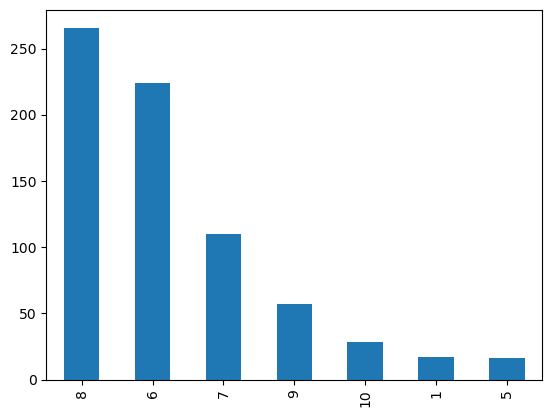

In [1]:
%matplotlib inline

import pandas as pd

df = pd.read_csv("http://media.sundog-soft.com/SelfDriving/FuelEfficiency.csv")

gear_counts = df['# Gears'].value_counts()

gear_counts.plot(kind='bar')

Podemos cargar Seaborn, y simplemente llamar a set() para cambiar la configuración predeterminada de matplotlib a algo más agradable visualmente.

In [2]:
import seaborn as sns
sns.set()

Ahora, si hacemos el mismo comando de trama, es un poco más moderno. Matplotlib se basa en Matplot, y sus valores predeterminados de visualización muestran francamente su edad.

<AxesSubplot:>

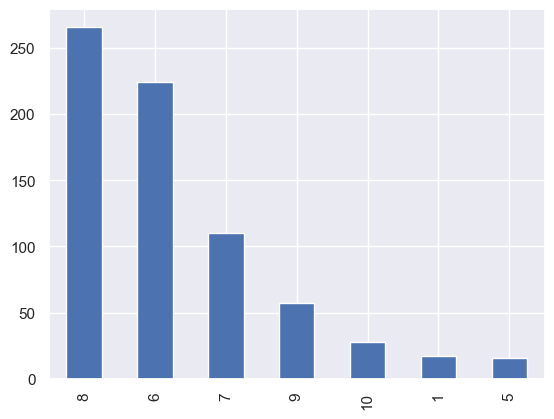

In [3]:
gear_counts.plot(kind='bar')

Echemos un vistazo más de cerca a los datos con los que estamos tratando.

In [4]:
df.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


Seaborn incluye muchos tipos de parcelas que matplotlib no ofrece. Por ejemplo, "distplot" se puede usar para trazar un histograma junto con una distribución suave de ese histograma superpuesto en él. Tracemos la distribución de los valores de MPG en los vehículos en esta base de datos como ejemplo:

C:\Users\Dell Inspiron\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CombMPG', ylabel='Density'>

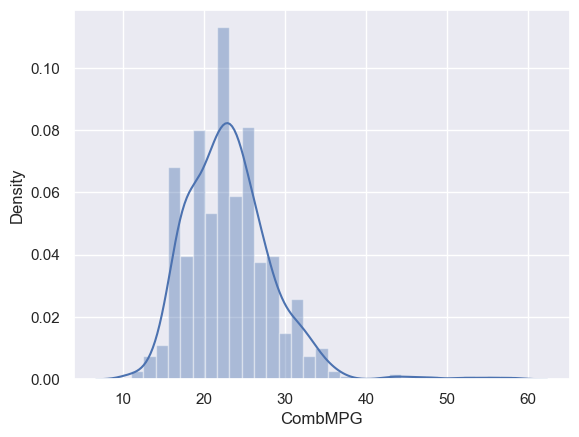

In [5]:
sns.distplot(df['CombMPG'])

Algo que encuentras con bastante frecuencia es una "trama de parejas" de Seaborn. Esto le permite visualizar gráficos de cada combinación de varios atributos juntos, para que pueda buscar patrones interesantes entre las entidades.

Como ejemplo, clasifiquemos los autos por cuántos cilindros hay en sus motores y busquemos relaciones entre cilindros, clasificación de MPG en ciudad, calificación de MPG en carretera y clasificación de MPG combinada.

In [6]:
df2 = df[['Cylinders', 'CityMPG', 'HwyMPG', 'CombMPG']]
df2.head()

,Cylinders,CityMPG,HwyMPG,CombMPG
0,8,18,25,21
1,16,9,14,11
2,8,12,20,15
3,8,15,25,18
4,8,14,23,17


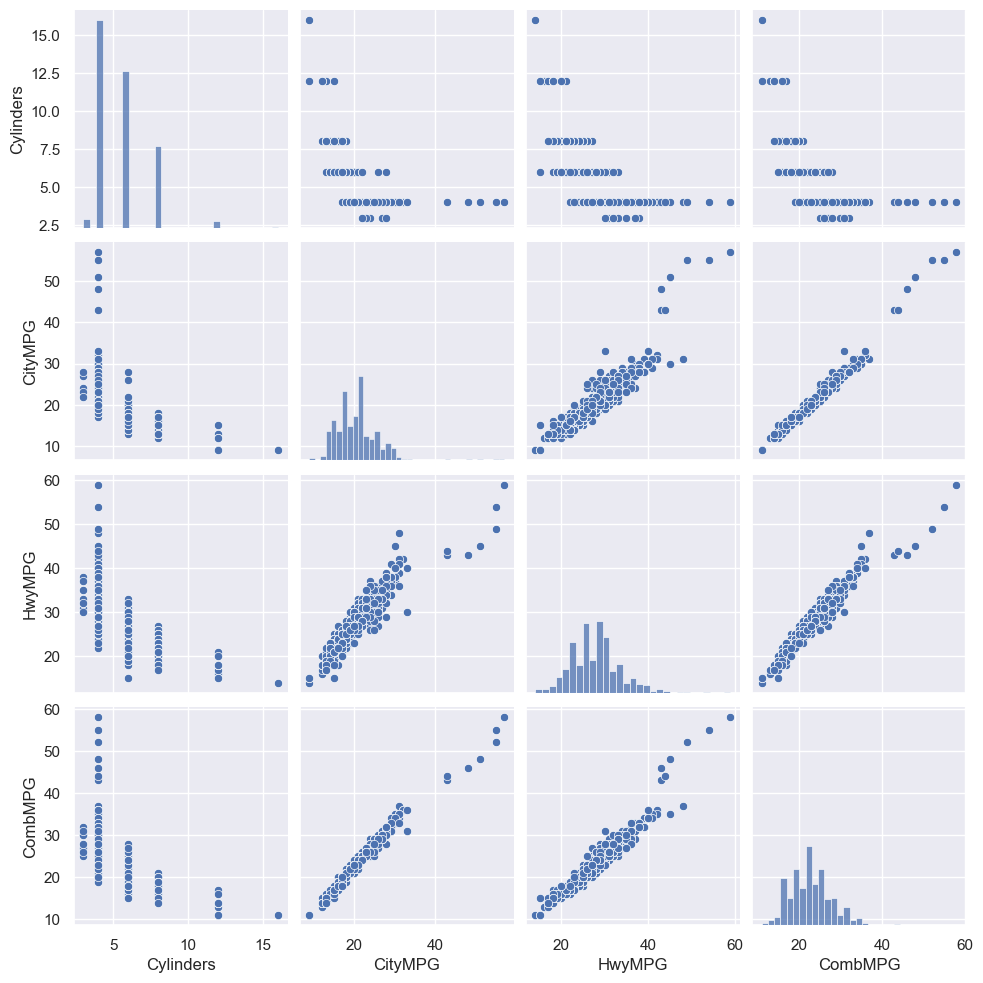

In [7]:
sns.pairplot(df2, height=2.5);  #Seaborn actualmente tiene un error con el parámetro hue, por lo que lo hemos omitido

Al estudiar los resultados anteriores, puede ver que existe una relación entre el número de cilindros y MPG, pero MPG para vehículos de 4 cilindros varía muy ampliamente. También parece haber una buena relación lineal entre las diferentes formas de medir los valores de MPG, hasta que se entra en las clasificaciones de MPG más altas.

Seaborn 1.9 también incluye "scatterplot", que es exactamente lo que parece. Traza puntos de datos individuales en dos ejes de su elección, para que pueda ver cómo se distribuyen sus datos en esas dimensiones.

<AxesSubplot:xlabel='Eng Displ', ylabel='CombMPG'>

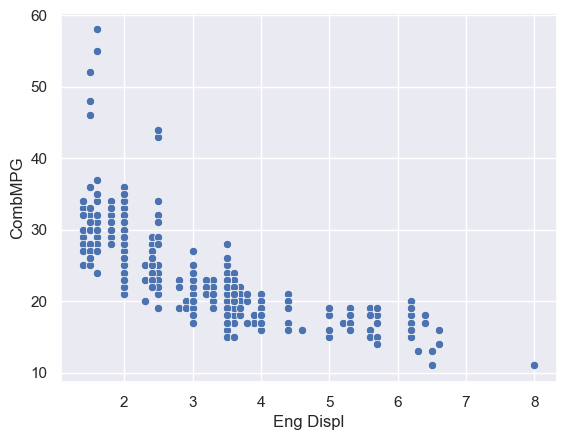

In [8]:
sns.scatterplot(x="Eng Displ", y="CombMPG", data=df)

Seaborn también ofrece una "parcela conjunta", que combina un diagrama de dispersión con histogramas en ambos ejes. Esto le permite visualizar tanto los puntos de datos individuales como la distribución en ambas dimensiones al mismo tiempo. 

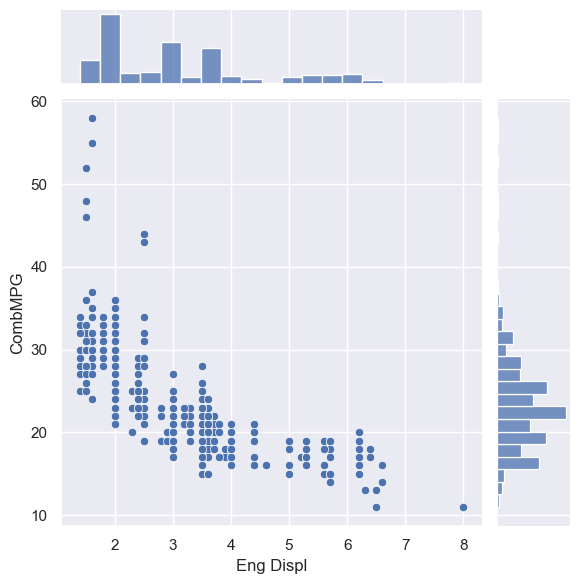

In [9]:
sns.jointplot(x="Eng Displ", y="CombMPG", data=df)

El "lmplot" es un diagrama de dispersión, pero con una línea de regresión lineal calculada y superpuesta a los datos.

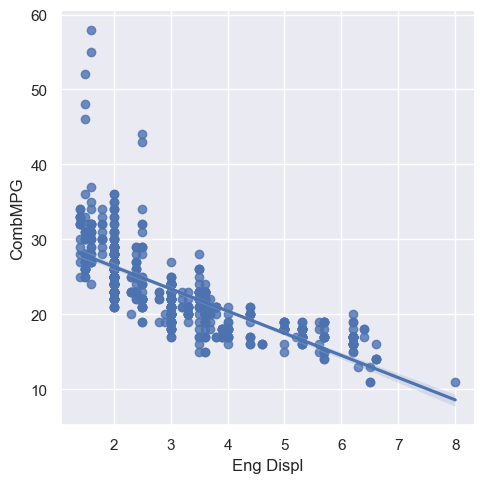

In [10]:
sns.lmplot(x="Eng Displ", y="CombMPG", data=df)

A continuación, veamos un "diagrama de caja". Esto es lo que se llama un gráfico de "caja y bigotes", que es útil para visualizar valores típicos para una categoría determinada sin distraerse con valores atípicos. Cada cuadro representa el rango entre el primer y tercer cuartil de los datos, con una línea que representa el valor mediano. Los "bigotes" que se extienden desde el cuadro representan la dispersión del resto de los datos, aparte de los valores atípicos claros que se trazan como puntos individuales fuera del bigote.

Como ejemplo, veamos los diagramas de caja para cada fabricante de vehículos, visualizando las clasificaciones de millas por galón en los vehículos que producen. Esto nos permite ver la propagación de las clasificaciones de MPG en todos los vehículos que ofrece cada fabricante.

Hay muchos fabricantes, por lo que para que el gráfico resultante sea legible, aumentaremos el tamaño de la figura predeterminada de Seaborn y también usaremos set_xticklabels para girar las etiquetas 45 grados.

[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

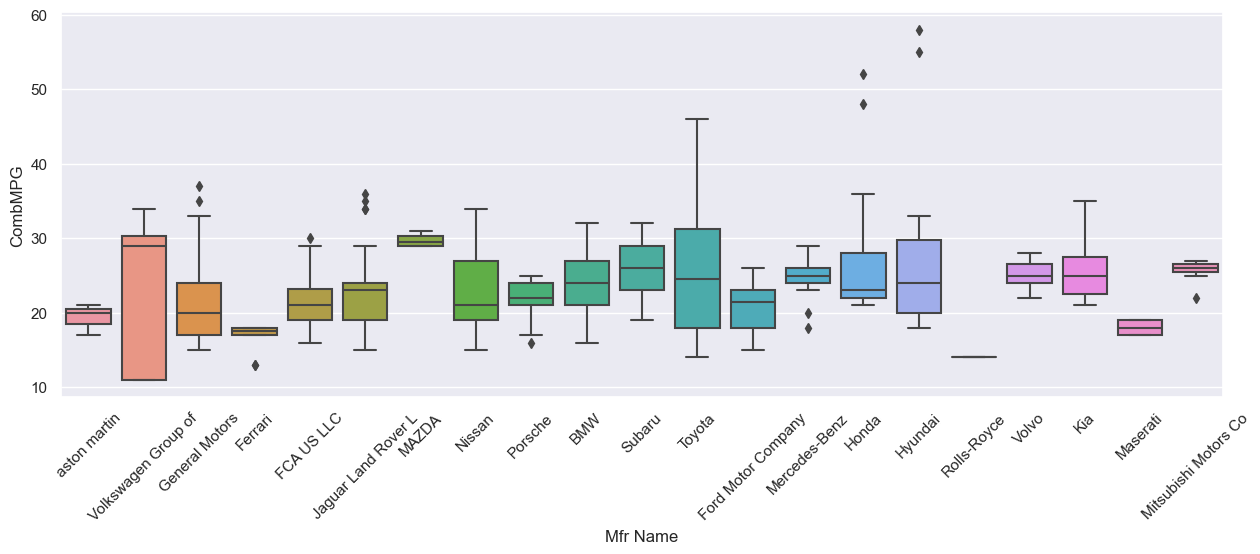

In [11]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Otra forma de visualizar los mismos datos es el "diagrama de enjambre". En lugar de cajas y bigotes, traza cada punto de datos individual, pero lo hace de tal manera que los agrupa en función de su distribución. Tiene más sentido cuando lo miras:

C:\Users\Dell Inspiron\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell Inspiron\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell Inspiron\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell Inspiron\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

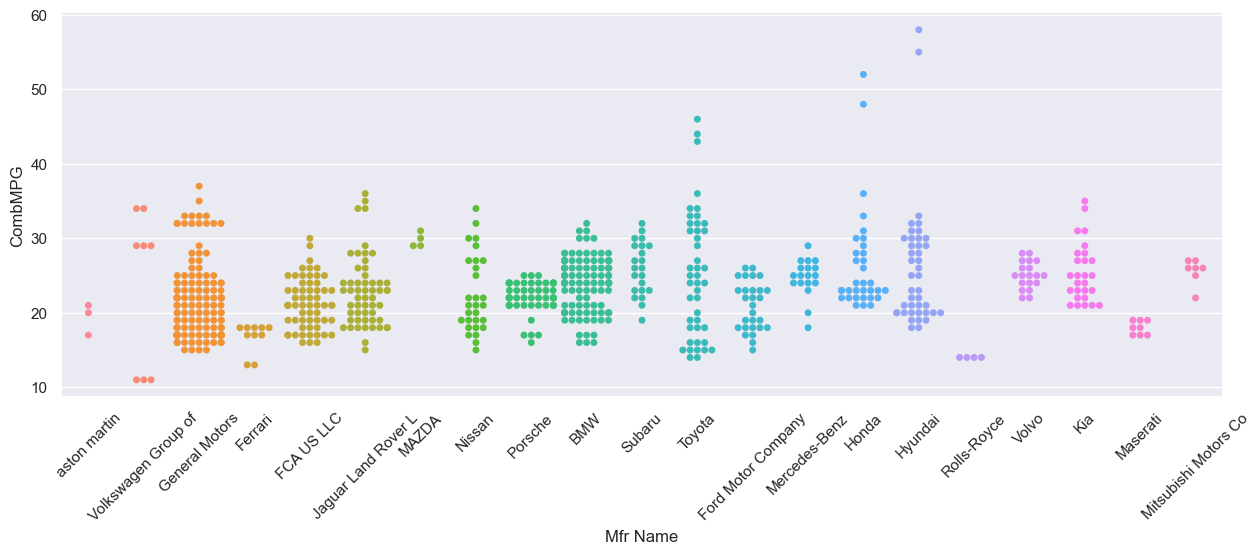

In [12]:
ax=sns.swarmplot(x='Mfr Name', y='CombMPG', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Otra herramienta es el "diagrama de conteo". Esto es básicamente lo mismo que un histograma, pero para datos categóricos. Le permite contar cuántas veces ocurre cada categoría dada en el eje X en sus datos y trazarla. Así, por ejemplo, podemos ver que General Motors ofrece más modelos de vehículos que nadie, con BMW no muy lejos.

[Text(0, 0, 'aston martin'),
 Text(1, 0, 'Volkswagen Group of'),
 Text(2, 0, 'General Motors'),
 Text(3, 0, 'Ferrari'),
 Text(4, 0, 'FCA US LLC'),
 Text(5, 0, 'Jaguar Land Rover L'),
 Text(6, 0, 'MAZDA'),
 Text(7, 0, 'Nissan'),
 Text(8, 0, 'Porsche'),
 Text(9, 0, 'BMW'),
 Text(10, 0, 'Subaru'),
 Text(11, 0, 'Toyota'),
 Text(12, 0, 'Ford Motor Company'),
 Text(13, 0, 'Mercedes-Benz'),
 Text(14, 0, 'Honda'),
 Text(15, 0, 'Hyundai'),
 Text(16, 0, 'Rolls-Royce'),
 Text(17, 0, 'Volvo'),
 Text(18, 0, 'Kia'),
 Text(19, 0, 'Maserati'),
 Text(20, 0, 'Mitsubishi Motors Co')]

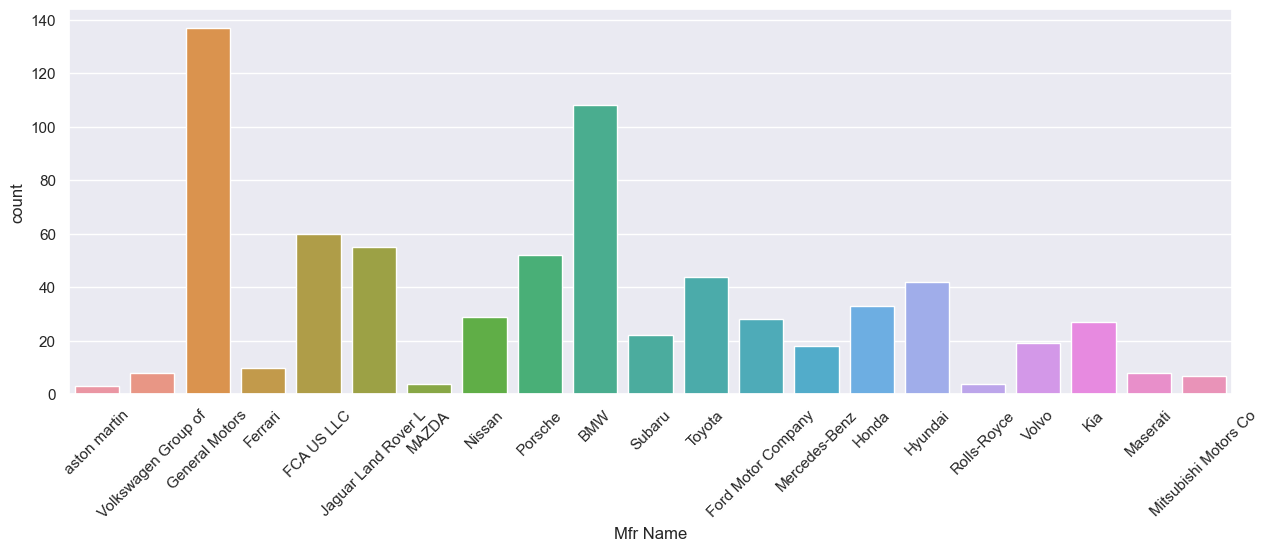

In [13]:
ax=sns.countplot(x='Mfr Name', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Finalmente, veamos un mapa de calor en Seaborn. Un mapa de calor le permite trazar datos tabulares 2D de algún tipo, con colores que representan los valores individuales en cada celda de la tabla 2D.

En este ejemplo, crearemos una tabla dinámica a partir de nuestro marco de datos original, para crear una tabla 2D que contenga las clasificaciones promedio de MPG para cada combinación de número de cilindros y desplazamiento del motor.

El mapa de calor resultante muestra todos los valores de desplazamiento del motor a lo largo del eje X y todos los valores de cilindros a lo largo del eje Y. Para cada celda de la tabla, la clasificación promedio real de MPG para esa combinación de cilindros y desplazamiento del motor se representa no como un número, sino como un color que varía de oscuro para valores pequeños y claro para valores más grandes.

Y, esto le permite visualizar una tendencia clara donde las cosas se vuelven progresivamente más oscuras a medida que nos movemos de la parte superior izquierda del gráfico a la parte inferior derecha. Lo cual tiene sentido; Las clasificaciones de MPG más altas se asocian con un menor número de cilindros y valores de desplazamiento del motor más bajos. Para cuando llegamos a un motor de 8 litros y 16 cilindros, el MPG promedio está en su peor momento de aproximadamente 12, representado por el color negro.

Este gráfico en particular tiene muchos datos faltantes, pero el mapa de calor se ocupa de eso con gracia. ¡Un motor de 3 cilindros y 8 litros simplemente no existe!

<AxesSubplot:xlabel='Eng Displ', ylabel='Cylinders'>

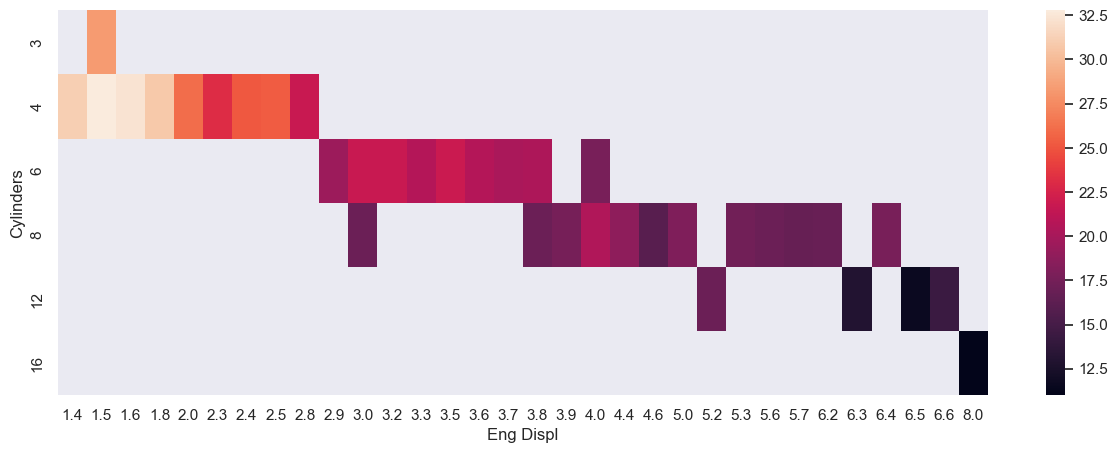

In [14]:
df2 = df.pivot_table(index='Cylinders', columns='Eng Displ', values='CombMPG', aggfunc='mean')
sns.heatmap(df2)

My solution is below - no peeking ahead of time!
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>



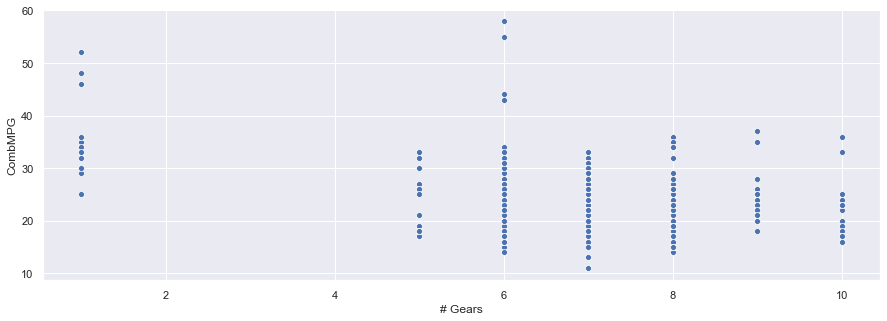

In [15]:
sns.scatterplot(x='# Gears', y="CombMPG", data=df)

A scatterplot arranges itself into columns when you have ordinal data like the number of gears, but it tells us that there's a pretty wide range of MPG values for each type of gear box, although if you look at where the data points are clustered, you can sort of see a downward trend in MPG as the number of gears increases. But it's subtle.

We also see that there's such a thing as a single gear car. These are "continuously variable transmission" cars, and we can see they typically have high MPG ratings and are therefore quite efficient.

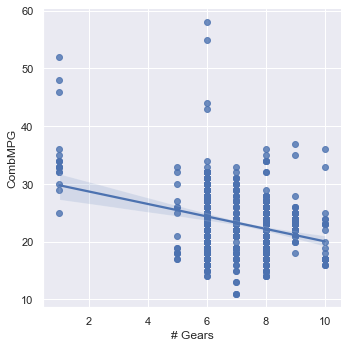

In [16]:
sns.lmplot(x='# Gears', y="CombMPG", data=df)

The "lmplot" gives us a linear regression of our data overlaid on the graph, and this makes the overall trend of lower MPG's with more gears apparent. More gears isn't better when it comes to efficiency, it seems. We also see the error bars on that regression line, which tells us this trend is probably real and not just the result of randomness in the samples.

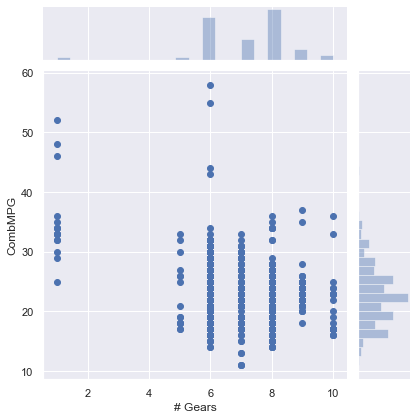

In [17]:
sns.jointplot(x='# Gears', y="CombMPG", data=df)

The jointplot gives us histograms on each axis, which provides some interesting insights. The most common gear configuration seems to be 8, with 6 closely behind. And MPG ratings seem to roughly follow a bell curve centered at around 22 or so.

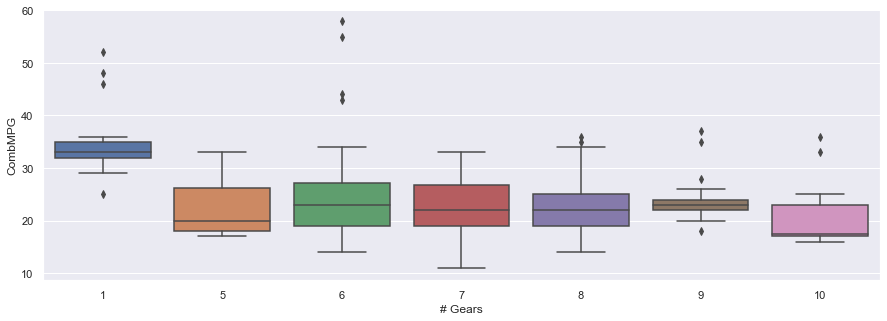

In [18]:
sns.boxplot(x='# Gears', y="CombMPG", data=df)

The box plot shows us that the range of MPG values we see on each gearbox type aren't as crazily distributed as it seemed at first glance; many of the extreme values are in fact outliers that are best discarded when analyzing the trends. This makes the real relationships easier to see; those continuously variable transmissions with a single gear are really quite good at fuel efficiency (higher MPG's are more efficient). Between 5 and 8 things are roughly the same, but from 8-10 things decline markedly.

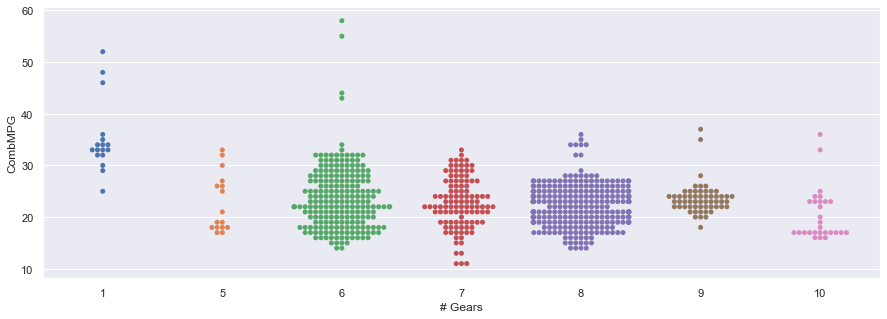

In [19]:
sns.swarmplot(x='# Gears', y="CombMPG", data=df)

The swarm plot makes it even more apparent that those high MPG outliers are in fact outliers on the 6-gear vehicles; the vast majority of 6-gear vehcles have less than 32 MPG. And the overall trend is perhaps easiest to visualize and understand in this representation.

So, our final verdict: more gears result in worse fuel efficiency. Which strikes me as a little counter-intuitive! But, this is real data from the US Department of Energy for 2019 model year cars, and that's a real conclusion we've drawn, thanks to Seaborn!